# TRABAJO PRÁCTICO Nº 2

**Alumnos:**
- Nahuel Arrieta
- Lucas moyano

In [89]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def read_image(image_name):
  image_path = "./images/" + image_name

  # Read the image
  image = cv2.imread(image_path)
  if image is None:
    sys.exit("Could not read the image " + image_path)
  return image

In [91]:
def show_image(label, image):
  # Convert the image from BGR to RGB for displaying in Jupyter Notebook
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image using Matplotlib
  plt.figure(figsize=(6, 6))
  plt.imshow(image_rgb, cmap='gray' if len(image.shape) == 2 else None)
  plt.title(label)
  plt.axis('off')
  plt.show()


## Seccion 1: Histogramas

### 1. Calcular el histograma de una imagen en escala de grises y de cada canal de una imagen a color. Visualizar los histogramas usando Matplotlib.

In [92]:
def calculate_histogram(image, channels=None):
    if channels:
        histograms = []
        for i in channels:
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            histograms.append(hist)
        return histograms
    else:
        # Histograma para imagen en escala de grises
        return cv2.calcHist([image], [0], None, [256], [0, 256])


In [93]:
def plot_histogram(histograms, labels, title="Histograma", colors=None):
    plt.figure(figsize=(10, 5))
    for i, hist in enumerate(histograms):
        plt.plot(hist, color=colors[i] if colors else 'black', label=labels[i])
    plt.title(title)
    plt.xlabel('Valor de intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

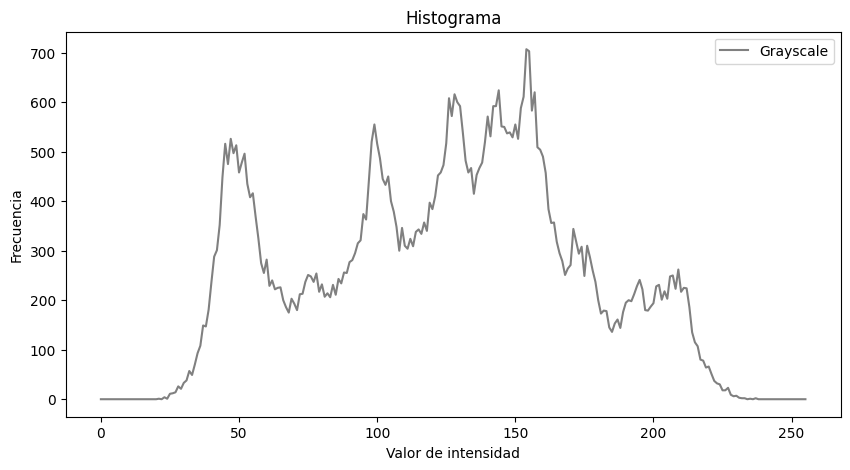

In [94]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_gray = calculate_histogram(gray_image)
plot_histogram([hist_gray], ["Grayscale"], colors=['gray'])

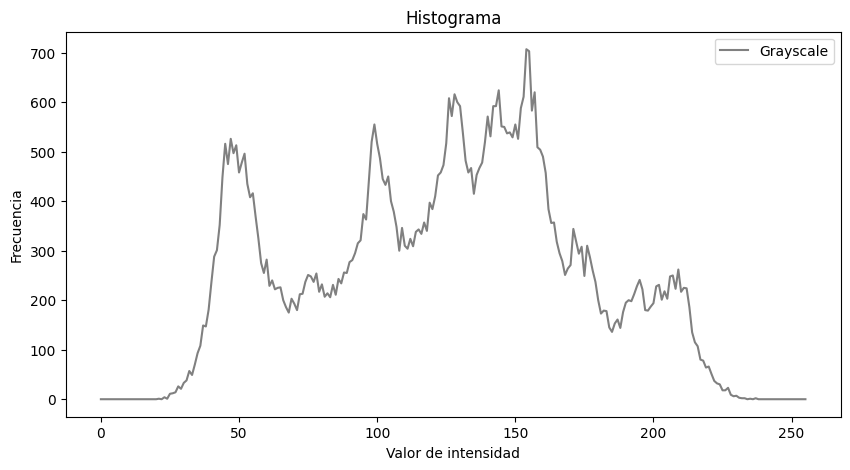

In [95]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_gray = calculate_histogram(gray_image)
plot_histogram([hist_gray], ["Grayscale"], colors=['gray'])

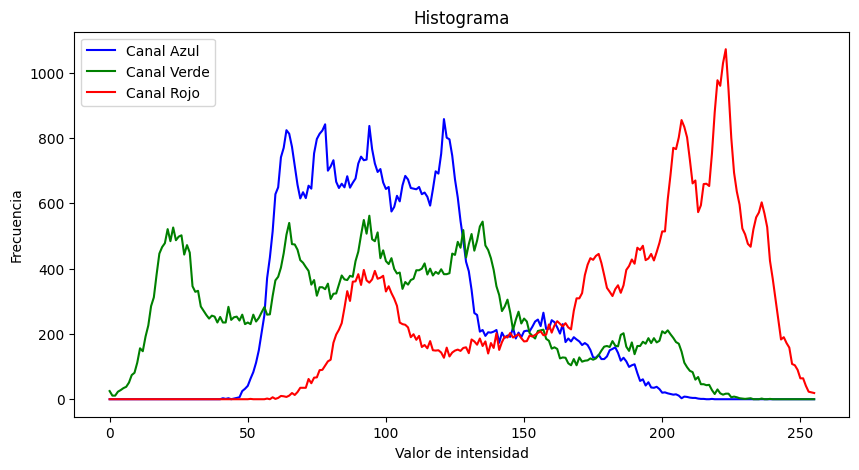

In [96]:
image = read_image("Lenna.png")
hist_channels = calculate_histogram(image, channels=[0, 1, 2])
plot_histogram(hist_channels, labels=["Canal Azul", "Canal Verde", "Canal Rojo"],  colors=["blue", "green", "red"])

### 2. Convertir una imagen de color a escala de grises y HSV. Extraer cada canal de color por separado y mostrarlo con histograma.

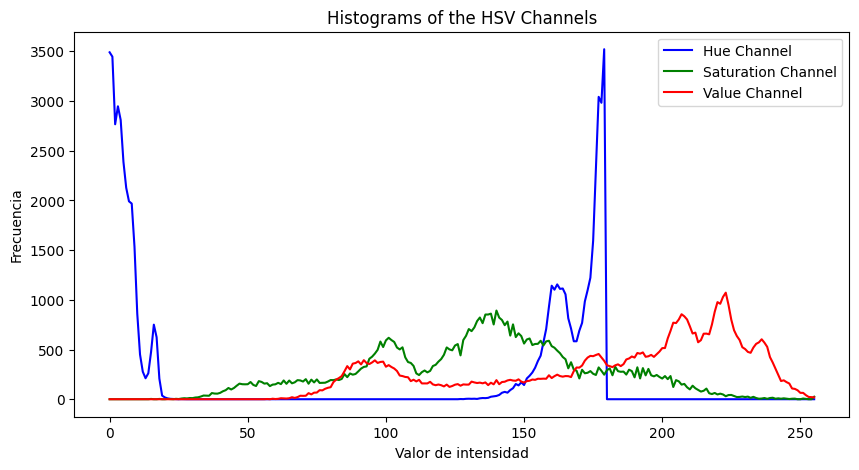

In [97]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist_channels_hsv = calculate_histogram(hsv_image, channels=[0, 1, 2])
plot_histogram(hist_channels_hsv, labels=["Hue Channel", "Saturation Channel", "Value Channel"], title="Histograms of the HSV Channels", colors=["blue", "green", "red"])

### 3. Cargar una imagen en escala de grises y a color. Posteriormente, modificar un conjunto de p´ıxeles en una regi´on espec´ıfica (por ejemplo, convertir una zona a negro). Calcular el negativo de una imagen invirtiendo los valores de p´ıxeles.

In [98]:
def modify_region_to_black(image, start_x, start_y, width, height):
    image_copy = image.copy()
    image_copy[start_y:start_y + height, start_x:start_x + width] = 0  
    return image_copy
    

In [99]:
def calculate_negative(image):
    return 255 - image

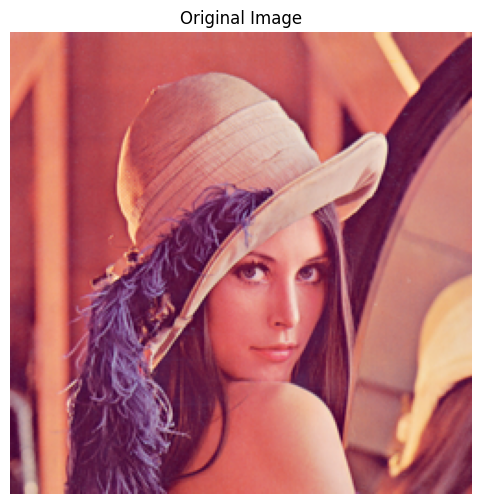

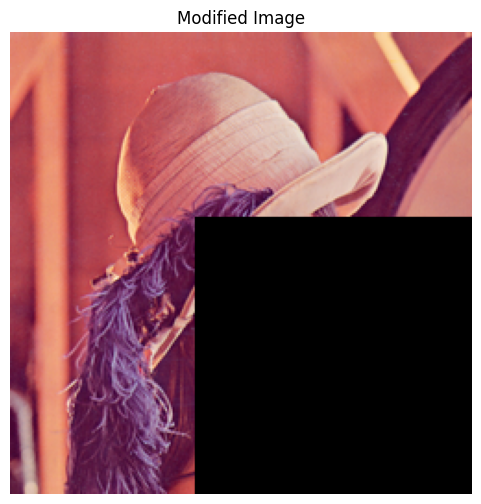

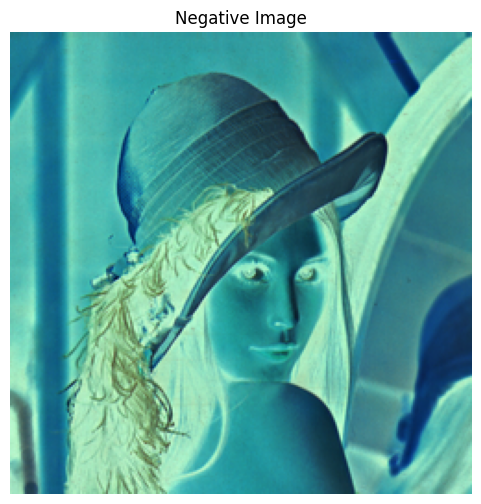

In [100]:
image = read_image("Lenna.png")

show_image("Original Image", image)

modified_image = modify_region_to_black(image, 100, 100, 200, 200)
show_image("Modified Image", modified_image)

negative_image = calculate_negative(image)
show_image("Negative Image", negative_image)

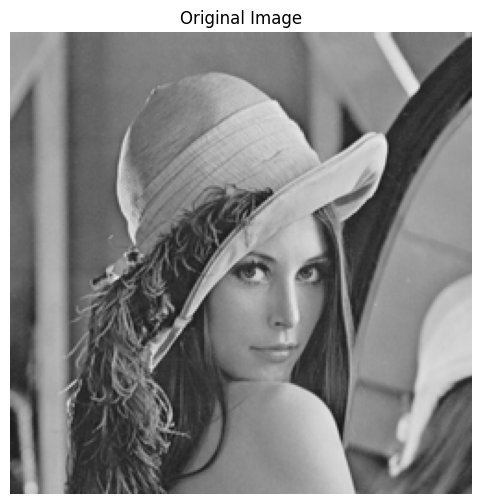

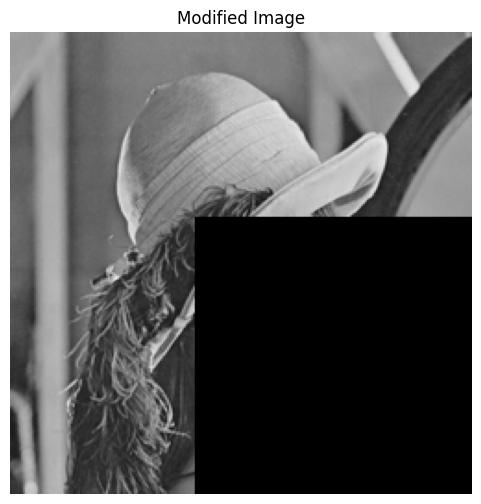

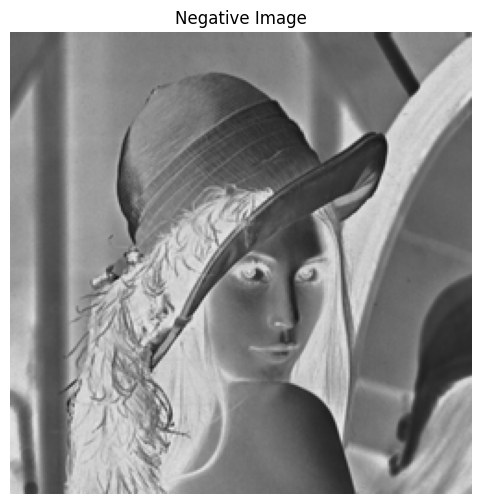

In [101]:
image = read_image("Lenna.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image("Original Image", image)

modified_image = modify_region_to_black(image, 100, 100, 200, 200)
show_image("Modified Image", modified_image)

negative_image = calculate_negative(image)
show_image("Negative Image", negative_image)

### 4. Implementar una transformaci´on lineal de la forma I’=α I+β donde α es el factor de contraste y β es el ajuste de brillo.

In [102]:
def linear_transformation(image, alpha, beta):
    # Apply linear transformation
    transformed_image = (image * alpha) + beta
    
    # Clip the values to be in the valid range
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

    return transformed_image

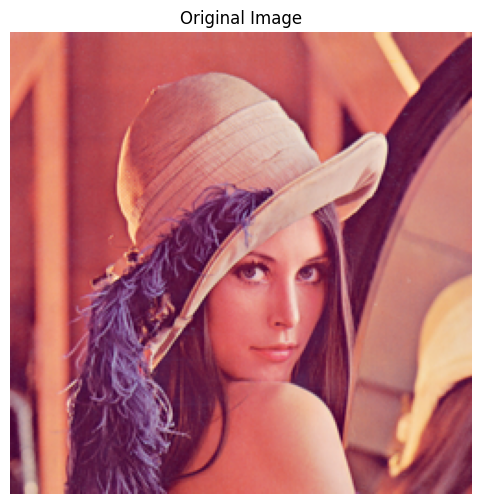

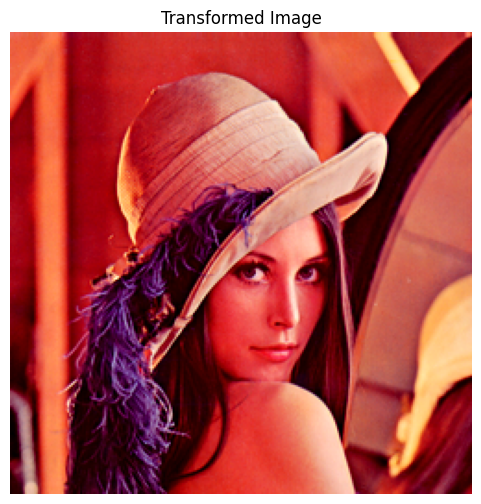

In [103]:
image = read_image("Lenna.png")
show_image("Original Image", image)

transformed_image = linear_transformation(image, 1.5, -100)
show_image("Transformed Image", transformed_image)

### 5. Cargar dos im´agenes diferentes (por ejemplo, fotos tomadas en diferentes condiciones de iluminaci´on). Calcular sus histogramas y compararlos usando diferentes m´etricas (correlaci´on, chi-cuadrado, intersecci´on).

In [104]:
def compare_histograms(hist1, hist2):
    # Correlation (1 means perfect correlation, -1 means no correlation)
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

    # Chi-Square (0 means identical histograms)
    chi_square = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

    # Intersection (1 means identical histograms)
    intersection = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)

    return correlation, chi_square, intersection

In [105]:
image_1 = read_image("Lenna.png")
image_2 = read_image("mate.png")

hist_1 = calculate_histogram(image_1, channels=[0, 1, 2])
hist_2 = calculate_histogram(image_2, channels=[0, 1, 2])


In [106]:
# Compare histograms using different metrics
correlation, chi_square, intersection = compare_histograms(hist_1[0], hist_2[0])

# Print the results
print(f"Correlation: {correlation}")
print(f"Chi-Square: {chi_square}")
print(f"Intersection: {intersection}")

Correlation: -0.020339642912952857
Chi-Square: 179053.39158487515
Intersection: 2175.0


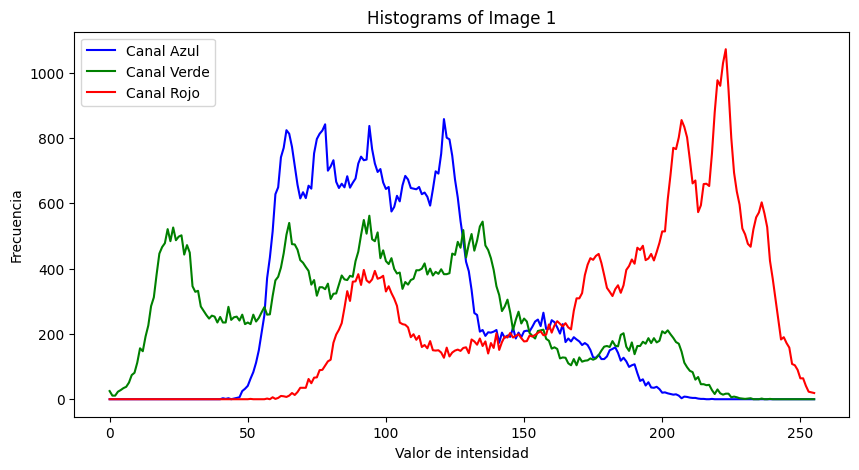

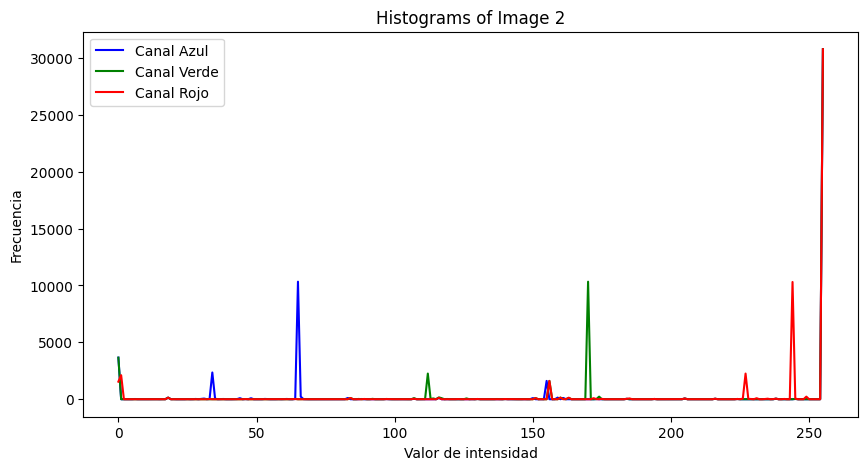

In [107]:
plot_histogram(hist_1, labels=["Canal Azul", "Canal Verde", "Canal Rojo"], title="Histograms of Image 1", colors=["blue", "green", "red"])
plot_histogram(hist_2, labels=["Canal Azul", "Canal Verde", "Canal Rojo"], title="Histograms of Image 2", colors=["blue", "green", "red"])

### 7. (*) Transformar la distribución de intensidades de una imagen para que se parezca a la de otra. Implementar el ajuste de histograma usando OpenCV o skimage.exposure.match histograms(). Comparar los histogramas antes y despu´es del ajuste.

In [108]:
from skimage import exposure

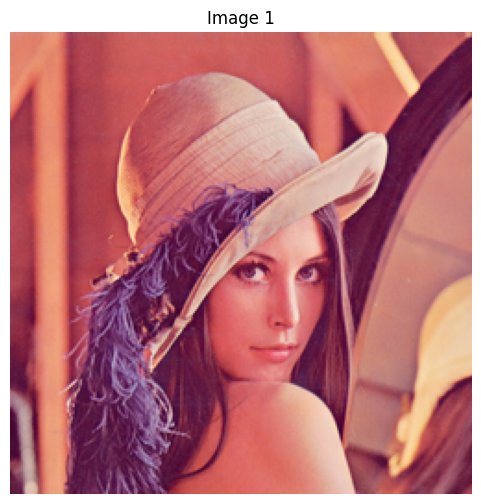

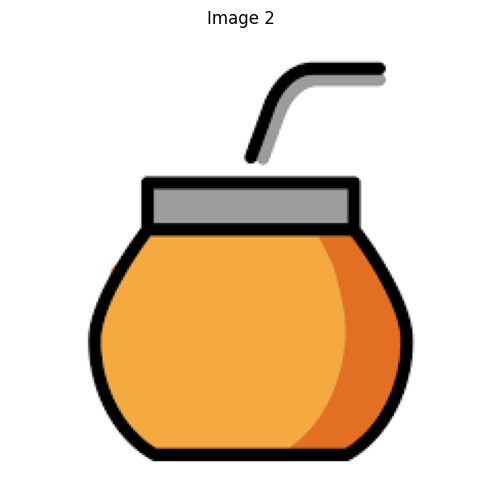

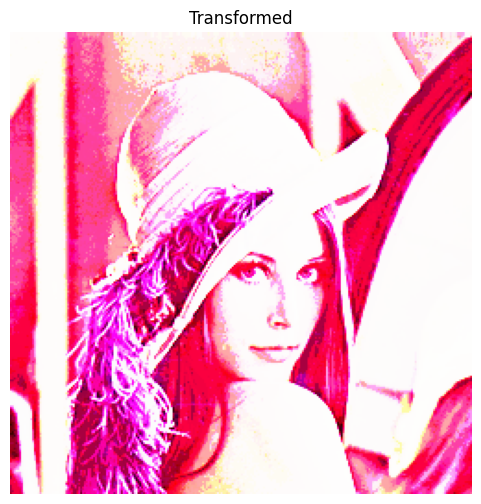

In [109]:
image1_transformed = exposure.match_histograms(image_1, image_2)
image1_transformed = np.uint8(image1_transformed) ## Convert to uint8 if needed

show_image("Image 1", image_1)
show_image("Image 2", image_2)
show_image("Transformed", image1_transformed)

### 8. (*) Aplicar ecualizaci´on de histograma a una imagen en escala de grises. Comparar la imagen original con la ecualizada.

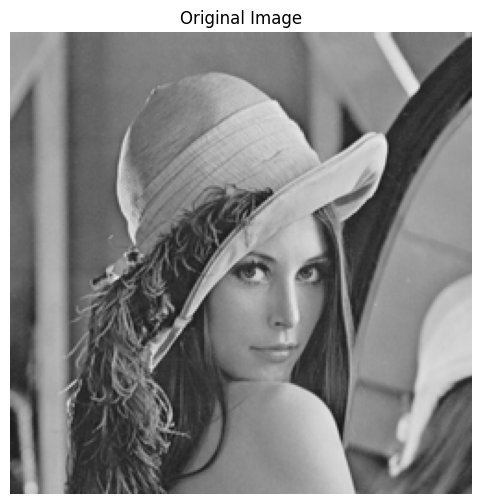

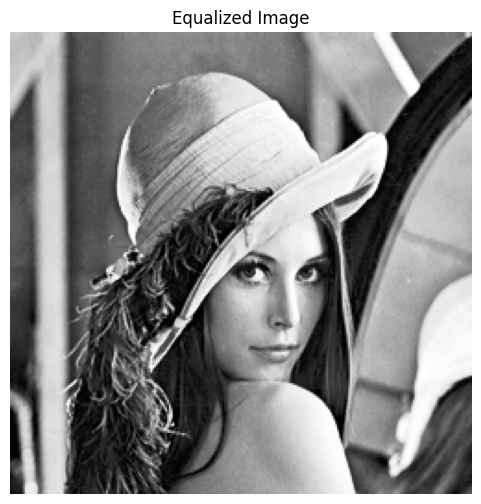

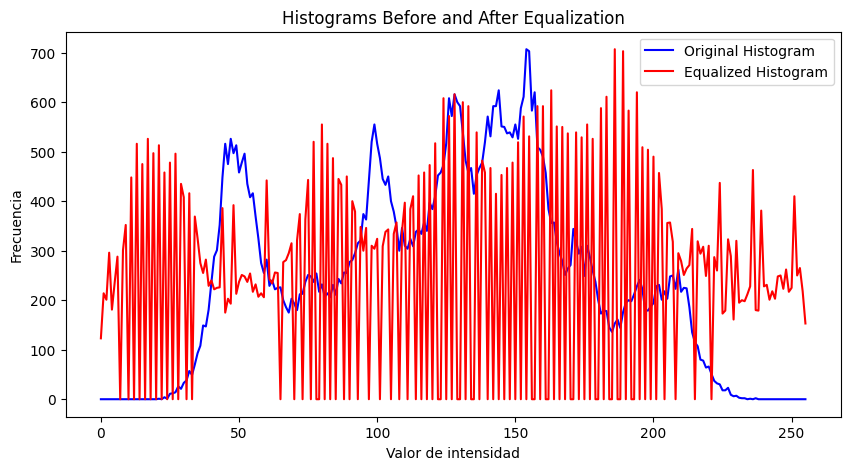

In [110]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(grayscale_image)
show_image("Original Image", grayscale_image)
show_image("Equalized Image", equalized)

original_hist = calculate_histogram(grayscale_image)
equalized_hist = calculate_histogram(equalized)
plot_histogram([original_hist, equalized_hist], labels=["Original Histogram", "Equalized Histogram"], title="Histograms Before and After Equalization", colors=["blue", "red"])

### 9.

In [111]:
def manual_threshold(image, threshold_value):
    # Create a new image with the same dimensions as the original image
    thresholded_image = image.copy()

    # Iterate through each pixel and apply the threshold
    for i in range(image.shape[0]):  # Iterate over rows (height)
        for j in range(image.shape[1]):  # Iterate over columns (width)
            if image[i, j] > threshold_value:
                thresholded_image[i, j] = 255  # Set to white
            else:
                thresholded_image[i, j] = 0    # Set to black
    
    return thresholded_image

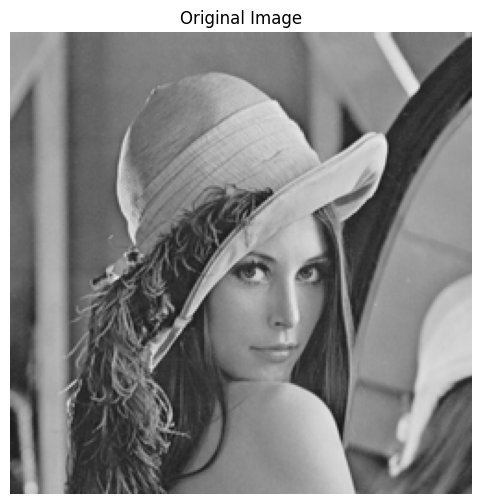

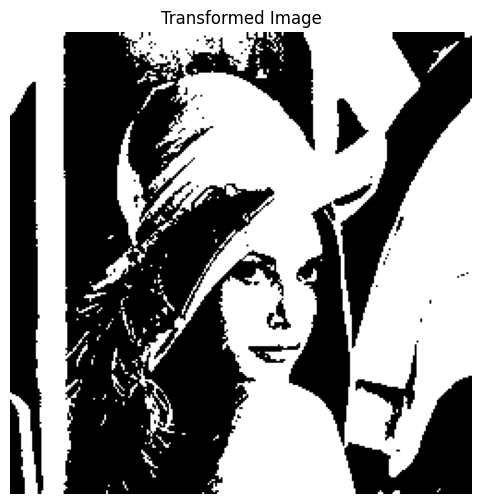

In [112]:
transformed_image = manual_threshold(grayscale_image, 128)
show_image("Original Image", grayscale_image)
show_image("Transformed Image", transformed_image)

In [113]:
def otsu_threshold(image):
    _, otsu_thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_thresholded_image

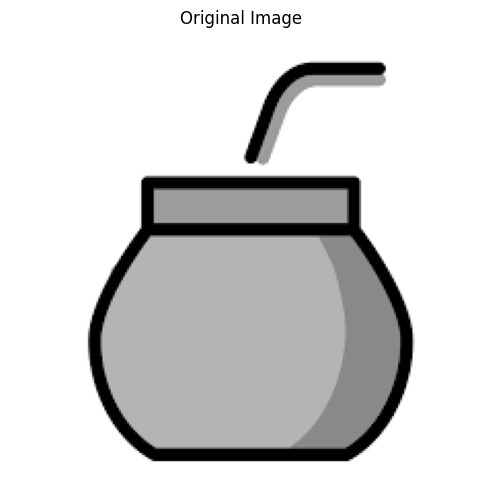

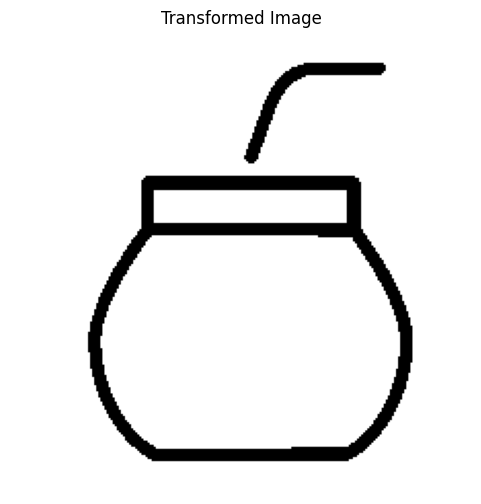

In [114]:
image = read_image("mate.png")
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
transformed_image = otsu_threshold(grayscale_image)
show_image("Original Image", grayscale_image)
show_image("Transformed Image", transformed_image)

### 10.

In [115]:
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(image)
    return clahe_image

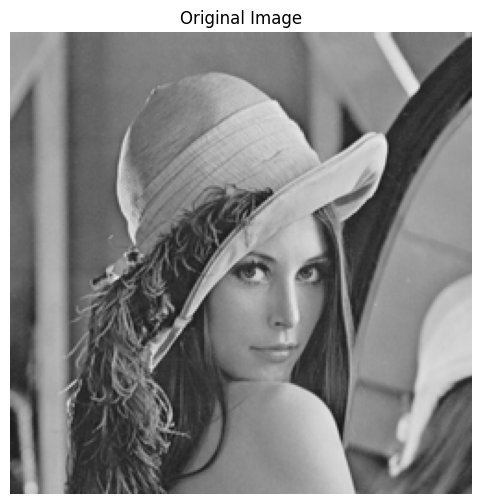

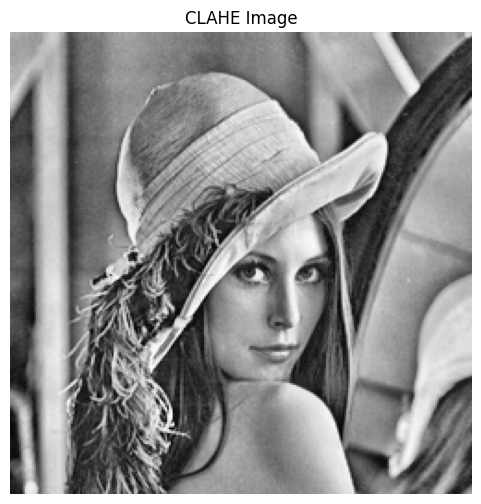

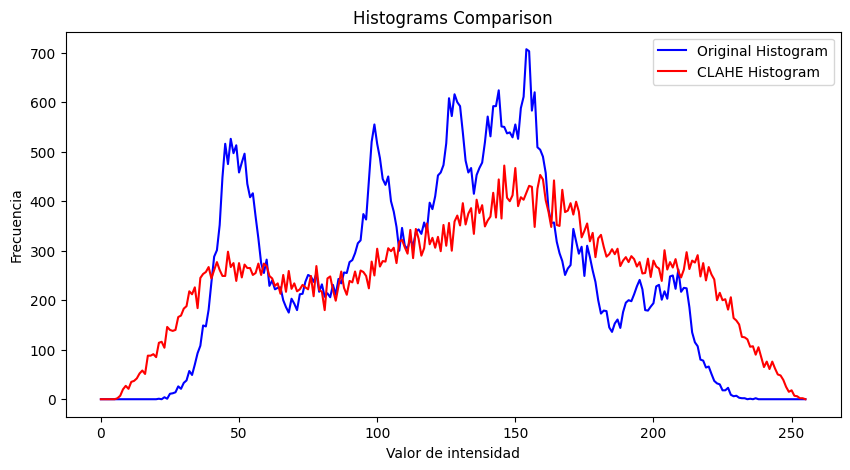

In [116]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe_image = apply_clahe(gray_image)

show_image("Original Image", gray_image)
show_image("CLAHE Image", clahe_image)

original_histogram = calculate_histogram(gray_image)
clahe_histogram = calculate_histogram(clahe_image)

plot_histogram([original_histogram, clahe_histogram], labels=["Original Histogram", "CLAHE Histogram"], title="Histograms Comparison", colors=["blue", "red"])

### 11.  (*) Implementar la transformaci´on gamma I’=I^y permitiendo ajustar el valor de y dinámicamente. Aplicar diferentes valores de y en distintas regiones de la imagen (por ejemplo, usando una m´ascara o adaptando y en funci´on del brillo local). Visualizar el efecto de la correcci´on gamma en la imagen y en su histograma.

In [117]:
def gamma_correction(image, gamma):
    # Normalize the image to [0, 1]
    image_normalized = np.float32(image) / 255.0
    # Apply gamma correction
    image_gamma_corrected = np.power(image_normalized, gamma)
    # Rescale to [0, 255]
    image_gamma_corrected = np.uint8(image_gamma_corrected * 255)
    return image_gamma_corrected

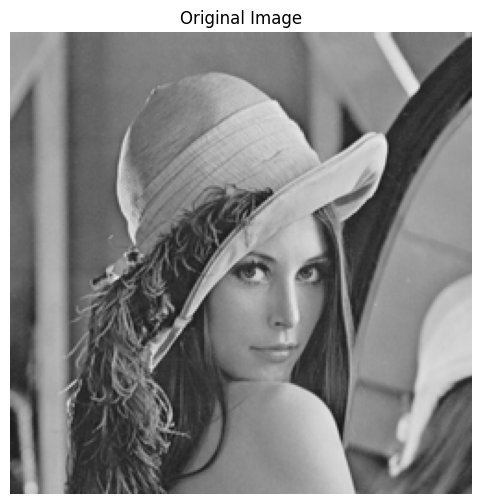

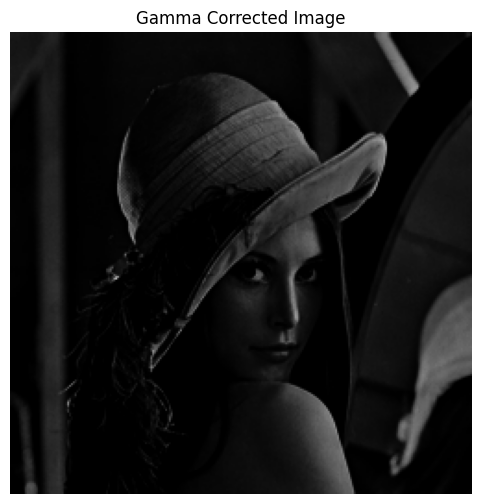

In [118]:
image = read_image("Lenna.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gamma_corrected_image = gamma_correction(gray_image, 5)
show_image("Original Image", gray_image)
show_image("Gamma Corrected Image", gamma_corrected_image)

In [119]:
def gamma_correction_by_map(image, gamma, image_map):
    # Normalize the image to [0, 1]
    image_normalized = np.float32(image) / 255.0

    # Rescale the image map to [0, 1]
    image_map_normalized = np.float32(image_map) / 255.0

    # Resize the image map to match the image dimensions
    image_map_normalized = cv2.resize(image_map_normalized, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)

    # Create a mask for the pixels to be modified
    mask = image_map_normalized > 0
    
    # Apply the mapping
    for i in range(image_normalized.shape[0]):
        for j in range(image_normalized.shape[1]):
            if mask[i, j]:
                image_normalized[i, j] = np.power(image_normalized[i, j], gamma)
    
    # Rescale to [0, 255]
    image_gamma_corrected = np.uint8(image_normalized * 255)

    return image_gamma_corrected


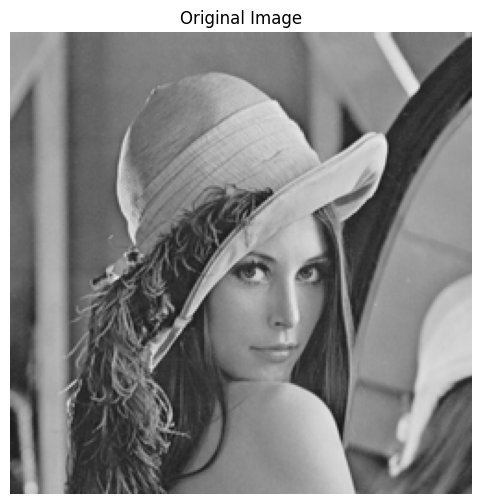

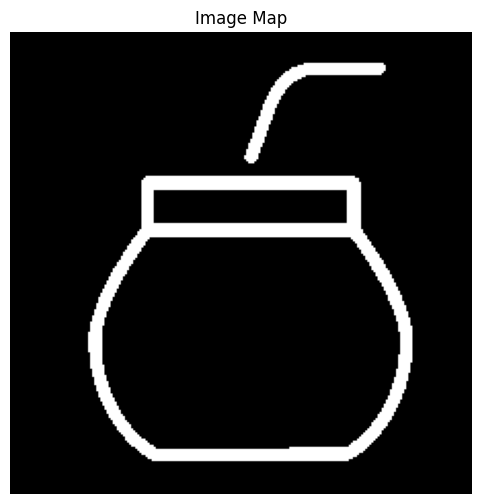

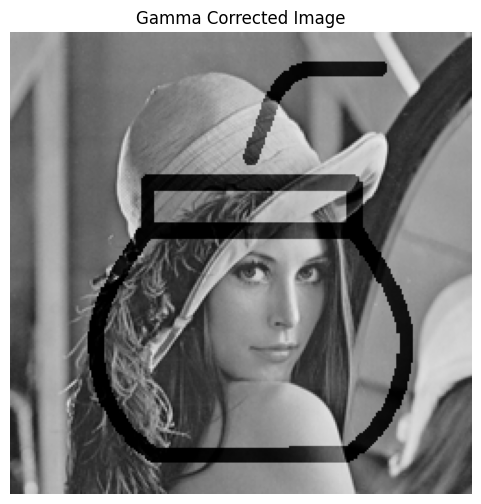

In [120]:
image = read_image("Lenna.png")
image_map = read_image("mate.png")

image_map = cv2.cvtColor(image_map, cv2.COLOR_BGR2GRAY)
image_map = cv2.threshold(image_map, 128, 255, cv2.THRESH_BINARY)[1]
image_map = cv2.bitwise_not(image_map)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gamma_corrected_image = gamma_correction_by_map(image, 5, image_map)

show_image("Original Image", image)
show_image("Image Map", image_map)
show_image("Gamma Corrected Image", gamma_corrected_image)
